In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#in Kaggle, File -> Add or upload data -> search for credit card
#note about the folder: ../input/creditcard
#change the folder if you have data in a different folder
data = pd.read_csv("C://Users/yashh/Downloads/creditcard.csv")
#data.head()
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
#check if there are missing data
data.isnull().any().any()

#change 'Class' dtype to "bool"
data['Class'] = data['Class'].astype('bool')

In [4]:
class_zero = data.Class.value_counts().values[0]
class_one = data.Class.value_counts().values[1]
print(data["Class"].value_counts())

False    284315
True        492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class distribution')

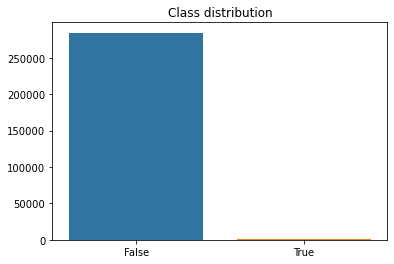

In [5]:
sb.barplot(x=data.Class.value_counts().index.values, y=data.Class.value_counts().values)
plt.title("Class distribution")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
data['AmountNormalized'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['AmountNormalized'].describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: AmountNormalized, dtype: float64

In [7]:
X = data.iloc[:, data.columns != 'Class'].values
y = data.iloc[:, data.columns == 'Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
def plot_precision_recall_curve(y_actual, y_score, model_name):
    precision, recall, _ = metrics.precision_recall_curve(y_actual, y_score)
    curve_data = pd.DataFrame(columns = range(0, len(precision)))
    curve_data.loc['Precision'] = precision
    curve_data.loc['Recall'] = recall
    #print (curve_data)
    plt.step(recall, precision, color='b', alpha=0.1, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.1, color='b')
    plt.title('Precision Recall Curve for {} Model'.format(model_name))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.05])
    plt.ylim([0, 1.0])

def evaluate_model(y_actual, y_pred, y_score, model_name):
    cm = metrics.confusion_matrix(y_actual, y_pred)
    print ('Confusion Matrix for {} Model'.format(model_name))
    print (cm)
    print ('Classification Report for {} Model'.format(model_name))
    print (metrics.classification_report(y_actual, y_pred, digits=6))
    print ('Area under under ROC curve for {} Model'.format(model_name))
    print (metrics.roc_auc_score(y_actual, y_score))
    plot_precision_recall_curve(y_actual, y_score, model_name)

C:\Users\yashh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression Model
[[56835    26]
 [   36    65]]
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

       False   0.999367  0.999543  0.999455     56861
        True   0.714286  0.643564  0.677083       101

    accuracy                       0.998912     56962
   macro avg   0.856826  0.821554  0.838269     56962
weighted avg   0.998862  0.998912  0.998883     56962

Area under under ROC curve for Logistic Regression Model
0.928522063792528


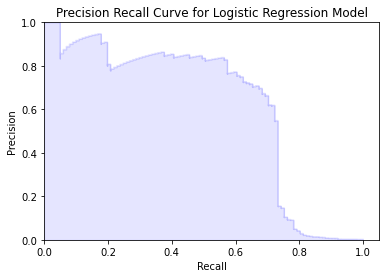

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
#note y_train.ravel()
lr.fit(X_train, y_train.ravel())
y_pred_lr = lr.predict(X_test)
y_score_lr = lr.decision_function(X_test)
y_prob_lr = lr.predict_proba(X_test)

evaluate_model(y_test, y_pred_lr, y_prob_lr[:,[1]], 'Logistic Regression')

Confusion Matrix for KNN (n=5) Model
[[56861     0]
 [   96     5]]
Classification Report for KNN (n=5) Model
              precision    recall  f1-score   support

       False   0.998315  1.000000  0.999157     56861
        True   1.000000  0.049505  0.094340       101

    accuracy                       0.998315     56962
   macro avg   0.999157  0.524752  0.546748     56962
weighted avg   0.998318  0.998315  0.997552     56962

Area under under ROC curve for KNN (n=5) Model
0.5777933195088735


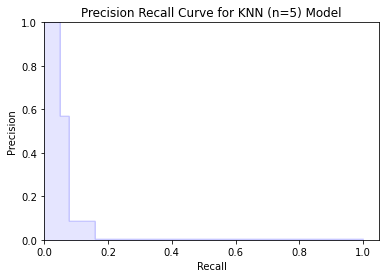

In [18]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=5)')

Confusion Matrix for KNN (n=3) Model
[[56859     2]
 [   93     8]]
Classification Report for KNN (n=3) Model
              precision    recall  f1-score   support

       False   0.998367  0.999965  0.999165     56861
        True   0.800000  0.079208  0.144144       101

    accuracy                       0.998332     56962
   macro avg   0.899184  0.539586  0.571655     56962
weighted avg   0.998015  0.998332  0.997649     56962

Area under under ROC curve for KNN (n=3) Model
0.5685685485240106


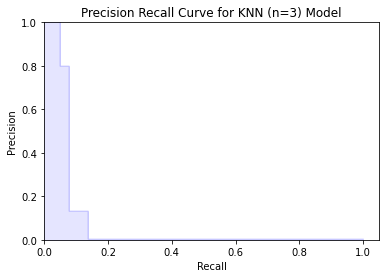

In [21]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=3, metric= 'euclidean')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=3)')

Confusion Matrix for KNN (n=3) Model
[[56859     2]
 [   93     8]]
Classification Report for KNN (n=3) Model
              precision    recall  f1-score   support

       False   0.998367  0.999965  0.999165     56861
        True   0.800000  0.079208  0.144144       101

    accuracy                       0.998332     56962
   macro avg   0.899184  0.539586  0.571655     56962
weighted avg   0.998015  0.998332  0.997649     56962

Area under under ROC curve for KNN (n=3) Model
0.5685685485240106


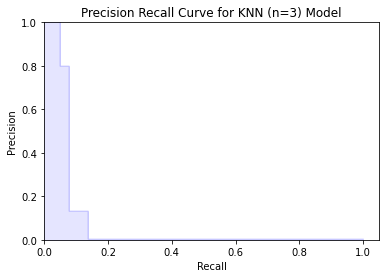

In [9]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=3)')

We can observe that even with different number of neighbors or the distance matrix we are not able to achieve good recall value vs logistic regression. Maybe hyper parameter approach may help in acheiving a better recall value.